<a href="https://colab.research.google.com/github/kmswin1/ConvolutionNeuralNetwork/blob/master/CNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import tensorflow as tf
import os
import cv2
import numpy as np
import time
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder

# Load the Drive helper and mount
from google.colab import drive

# This will prompt for authorization.
drive.mount('/content/drive', force_remount=True)
!ls "/content/drive/My Drive/Colab Notebooks"

Mounted at /content/drive
CNN.ipynb  data


In [0]:
TRAIN_DIR = "/content/drive/My Drive/Colab Notebooks/data/Training"
train_folder_list = np.array(os.listdir(TRAIN_DIR))
train_input = []
train_label = []
label_encoder = LabelEncoder()  # LabelEncoder Class 호출
onehot_encoder = OneHotEncoder(sparse=False) # OneHotEncoder 호출
integer_encoded = label_encoder.fit_transform(train_folder_list)
integer_encoded = integer_encoded.reshape(len(integer_encoded), 1)
onehot_encoded = onehot_encoder.fit_transform(integer_encoded)

for index in range(len(train_folder_list)):
    path = os.path.join(TRAIN_DIR, train_folder_list[index])
    path = path + '/'
    img_list = os.listdir(path)
    
    for img in img_list:
        img_path = os.path.join(path, img)
        img = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)
        train_input.append([np.array(img)])
        train_label.append([np.array(onehot_encoded[index])])

#print (train_input)
train_input = np.reshape(train_input, (-1, 80,80))
train_label = np.reshape(train_label, (-1, 2))
train_input = np.array(train_input).astype(np.float32)
train_label = np.array(train_label).astype(np.float32)

np.save("train_data.npy", train_input)
np.save("train_label.npy", train_label)


/usr/local/lib/python3.6/dist-packages/sklearn/preprocessing/_encoders.py:368: FutureWarning: The handling of integer data will change in version 0.22. Currently, the categories are determined based on the range [0, max(values)], while in the future they will be determined based on the unique values.
If you want the future behaviour and silence this warning, you can specify "categories='auto'".
In case you used a LabelEncoder before this OneHotEncoder to convert the categories to integers, then you can now use the OneHotEncoder directly.
  warnings.warn(msg, FutureWarning)


In [0]:
TEST_DIR = '/content/drive/My Drive/Colab Notebooks/data/Test'
test_folder_list = np.array(os.listdir(TEST_DIR))
 
test_input = []
test_label = []
 
label_encoder = LabelEncoder()
integer_encoded = label_encoder.fit_transform(test_folder_list)
 
onehot_encoder = OneHotEncoder(sparse=False) 
integer_encoded = integer_encoded.reshape(len(integer_encoded), 1)
onehot_encoded = onehot_encoder.fit_transform(integer_encoded)
 
for index in range(len(test_folder_list)):
    path = os.path.join(TEST_DIR, test_folder_list[index])
    path = path + '/'
    img_list = os.listdir(path)
    for img in img_list:
        img_path = os.path.join(path, img)
        img = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)
        test_input.append([np.array(img)])
        test_label.append([np.array(onehot_encoded[index])])

#print (test_input)
test_input = np.reshape(test_input, (-1, 80,80))
test_label = np.reshape(test_label, (-1, 2))
test_input = np.array(test_input).astype(np.float32)
test_label = np.array(test_label).astype(np.float32)
np.save("test_input.npy",test_input)
np.save("test_label.npy",test_label)

/usr/local/lib/python3.6/dist-packages/sklearn/preprocessing/_encoders.py:368: FutureWarning: The handling of integer data will change in version 0.22. Currently, the categories are determined based on the range [0, max(values)], while in the future they will be determined based on the unique values.
If you want the future behaviour and silence this warning, you can specify "categories='auto'".
In case you used a LabelEncoder before this OneHotEncoder to convert the categories to integers, then you can now use the OneHotEncoder directly.
  warnings.warn(msg, FutureWarning)


In [0]:
batch_size = 20
test_size = 5
training_epochs = 10

def init_weights(shape):
    return tf.Variable(tf.random_normal(shape, stddev=0.01))

# Filter weight vectors: w, w2, w3, w4, w_0
def model(X, w, w2, w3, w4, w5, w_o, p_keep_conv, p_keep_hidden):
    l1a = tf.nn.relu(tf.nn.conv2d(X, w,                       # l1a shape=(?, 80, 80, 32)
                        strides=[1, 1, 1, 1], padding='SAME'))
    l1 = tf.nn.max_pool(l1a, ksize=[1, 2, 2, 1],              # l1 shape=(?, 40, 40, 32)
                        strides=[1, 2, 2, 1], padding='SAME')
    l1 = tf.nn.dropout(l1, p_keep_conv)

    l2a = tf.nn.relu(tf.nn.conv2d(l1, w2,                     # l2a shape=(?, 40, 40, 64)
                        strides=[1, 1, 1, 1], padding='SAME'))
    l2 = tf.nn.max_pool(l2a, ksize=[1, 2, 2, 1],              # l2 shape=(?, 20, 20, 64)
                        strides=[1, 2, 2, 1], padding='SAME')
    l2 = tf.nn.dropout(l2, p_keep_conv)

    l3a = tf.nn.relu(tf.nn.conv2d(l2, w3,                     # l3a shape=(?, 20, 20x, 128)
                        strides=[1, 1, 1, 1], padding='SAME'))
    l3 = tf.nn.max_pool(l3a, ksize=[1, 2, 2, 1],              # l3 shape=(?, 10, 10, 128)
                        strides=[1, 2, 2, 1], padding='SAME')
    l3 = tf.nn.dropout(l3, p_keep_conv)
    
    l4a = tf.nn.relu(tf.nn.conv2d(l3, w4,                     # l4a shape=(?, 10, 10x, 256)
                        strides=[1, 1, 1, 1], padding='SAME'))
    l4 = tf.nn.max_pool(l4a, ksize=[1, 2, 2, 1],              # l4 shape=(?, 5, 5, 256)
                        strides=[1, 2, 2, 1], padding='SAME')
    l4 = tf.reshape(l4, [-1, w5.get_shape().as_list()[0]])    # reshape to (?, 4096)
    
    l4 = tf.nn.dropout(l4, p_keep_conv)

    l5 = tf.nn.relu(tf.matmul(l4, w5))
    l5 = tf.nn.dropout(l5, p_keep_hidden)

    pyx = tf.matmul(l5, w_o)
    return pyx

# Read data
trX, trY, teX, teY = train_input, train_label, test_input, test_label

# trx.reshape( n-inputs, image size, image size, depth )
 # this variable is input in model()
trX = trX.reshape(-1, 80, 80, 1)  # 80x80x1 input img
teX = teX.reshape(-1, 80, 80, 1)  # 80x80x1 input img

X = tf.placeholder("float", [None, 80, 80, 1])
Y = tf.placeholder("float", [None, 2])

w = init_weights([3, 3, 1, 32])       # 3x3x1 conv, 32 outputs
w2 = init_weights([3, 3, 32, 64])     # 3x3x32 conv, 64 outputs
w3 = init_weights([3, 3, 64, 128])    # 3x3x64 conv, 128 outputs
w4 = init_weights([3, 3, 128, 256])   # 3x3x128 conv, 256 outputs
w5 = init_weights([256 * 5 * 5, 1500]) # FC 256 * 5 * 5 inputs, 1500 outputs (Flatten Layer)
w_o = init_weights([1500, 2])         # FC 1500 inputs, 2 outputs (labels) (Fully-Connected Layer)

p_keep_conv = tf.placeholder("float")
p_keep_hidden = tf.placeholder("float")
py_x = model(X, w, w2, w3, w4, w5, w_o, p_keep_conv, p_keep_hidden)

cost = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(logits = py_x, labels = Y))
train_op = tf.train.RMSPropOptimizer(0.001, 0.9).minimize(cost)
predict_op = tf.argmax(py_x, 1)

init = tf.global_variables_initializer()
# Launch the graph in a session
eps = []
loss_tr = []
loss_va = []
with tf.Session() as sess:
    # you need to initialize all variables
    start_time = time.time()
    sess.run(init)
    for i in range(training_epochs):
        avg_cost = 0.
        avg_training_accuracy = 0.
        total_batch = 4
        init = 0
              
        for step in range(total_batch):
            batch_xs, batch_ys = train_input[init:init+batch_size], train_label[init:init+batch_size]
            batch_xs_image = batch_xs.reshape(-1, 80, 80, 1)
            sess.run(train_op, feed_dict={X: batch_xs_image, Y: batch_ys, p_keep_conv: 0.8, p_keep_hidden: 0.5})
            # Training average cost 계산
            avg_cost += sess.run(cost, feed_dict={X: batch_xs_image, Y: batch_ys, p_keep_conv:1.0, p_keep_hidden:1.0})/total_batch
            
            avg_training_accuracy += (np.mean(np.argmax(batch_ys, axis=1) ==
                         sess.run(predict_op, feed_dict={X: batch_xs_image,
                                                        Y: batch_ys,
                                                        p_keep_conv: 1.0,
                                                        p_keep_hidden: 1.0})))/total_batch
            if (init+batch_size > len(train_input)):
              init += len(train_input) - 1
            elif (init > len(train_input)):
              init = 0
            else:
              init += 20
        
        #training error: %.4f,  avg_cost
        print("Epoch: %d, training accuracy: %.4f"%(i,avg_training_accuracy))

        # testing accuracy 계산
        # 인덱스를 뒤 썩어 준다. 랜덤하게 3개 추출을 위해서
        test_indices = np.arange(test_input.shape[0]) # Get A Test Batch
        np.random.shuffle(test_indices)
        test_indices = test_indices[0:test_size] # 3개만 선택한다.
        teX = test_input[test_indices].reshape(-1, 80, 80, 1) # input을 2차원 image를 담은 3차원 matrix로 표현 
        testing_accuracy = np.mean(np.argmax(test_label[test_indices], axis=1) ==
                         sess.run(predict_op, feed_dict={X: teX,
                                                        Y: test_label[test_indices],
                                                        p_keep_conv: 1.0,
                                                        p_keep_hidden: 1.0}))

        print("Testing Accuracy: %.4f"%(testing_accuracy))
        
        eps.append(i)
        loss_tr.append(avg_training_accuracy)
        loss_va.append(testing_accuracy)

        
    print("time elapsed: {:.2f}s".format(time.time() - start_time))

Epoch: 0, training accuracy: 0.0375
Testing Accuracy: 0.6000
Epoch: 1, training accuracy: 0.7750
Testing Accuracy: 0.2000
Epoch: 2, training accuracy: 0.9750
Testing Accuracy: 0.8000
Epoch: 3, training accuracy: 0.9750
Testing Accuracy: 0.6000
Epoch: 4, training accuracy: 0.9750
Testing Accuracy: 0.6000
Epoch: 5, training accuracy: 0.9750
Testing Accuracy: 0.6000
Epoch: 6, training accuracy: 0.9750
Testing Accuracy: 0.8000
Epoch: 7, training accuracy: 0.9750
Testing Accuracy: 0.6000
Epoch: 8, training accuracy: 0.9750
Testing Accuracy: 0.8000
Epoch: 9, training accuracy: 0.9750
Testing Accuracy: 0.6000
time elapsed: 34.98s


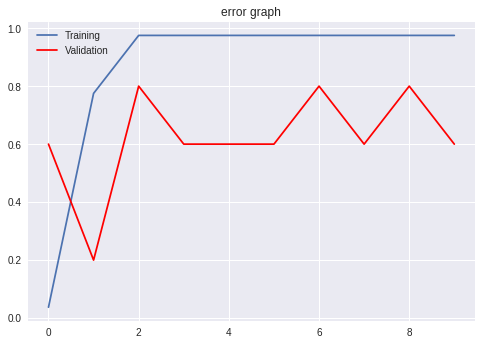

In [0]:
# Plot your train error and validation error by number of iterations.
plt.plot(eps, loss_tr, eps, loss_va, 'r-')
plt.title("error graph")
plt.legend(["Training", "Validation"])
plt.show()